### Introduction to Scientific Computing, Practical Markov Chains
Breno Cunha Queiroz s5091047\
Lukke van der Wal s4076788\
mar 14, 2022

<h1><center>Practical: Markov Chains</center></h1>

<h2>Assignment 3 - PageRank </h2>

In this assignment, the aim is to implement the PageRank algorithm, and analyze the effect of teleporting factor on the output of the algorithm.

### Importing necessary packages

In [26]:
# if you have already installed numpy and matplotlib, you can skip the next two lines
!pip install matplotlib
!pip install numpy

import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

You should consider upgrading via the 'C:\Users\lukke\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\lukke\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [27]:
# constructing the connectivity matrix
A = np.array([[1,1,0],[1,0,1],[0,0,1]])

## Implementing the elements of the PageRank algorithm


In order to perform the algorithm, we define the following functions:
- normalize_conn_matrix: computing the transition probability from the connecting matrix,
- appr_stationary: compute the stationary distribution, based on x(t) = x(t-1) . T,
- dead_end: to prevent dead end problem,
- teleporting_factor: to resolve spider trap, 

Hint. you may use "np.matmul" function for the matrix multiplication.

In [28]:
def normalize_conn_matrix(A):
    """
    A: (n*n) connectivity matrix
    T: transition probabilities
    """
    n = A.shape[0]
    T = np.zeros((n,n))

    # Calculate probability for each row
    probs = 1/A.sum(axis=1)

    # Create transition probabilities
    T = (A.T*probs).T
    
    return T

#print(normalize_conn_matrix(A))

In [29]:
# Test your code
T = normalize_conn_matrix(A)
print(T)

print("\n Expected solution:")
print("[[0.5 0.5 0. ] \n [0.5 0.  0.5] \n  [0.  0.  1. ]]")

[[0.5 0.5 0. ]
 [0.5 0.  0.5]
 [0.  0.  1. ]]

 Expected solution:
[[0.5 0.5 0. ] 
 [0.5 0.  0.5] 
  [0.  0.  1. ]]


In [30]:
def appr_stationary(T, maxiter=20):
    """
    T: transition probability,
    maxiter: number of steps
    x_m: the state vector
    """
    
    n = len(T[0])
    x = [[1/n] * n]
    for i in range(1, maxiter+1):
        x.append(np.matmul(x[i-1], T))
    x_m = x[maxiter]
    
    return x_m

In [31]:
# Test your code
st_dist = appr_stationary(T, maxiter=20)
print(st_dist)

print("\n Expected solution:")
print("[[0.00563018 0.00347964 0.99089019]]")


[0.00563018 0.00347964 0.99089019]

 Expected solution:
[[0.00563018 0.00347964 0.99089019]]


In [32]:
def dead_end(A):
    """
    A: connecting matrix
    A_new: connecting matrix by resolving the dead end problem
    """
    probs = A.sum(axis=1)
    probs = [ 1 if v == 0 else 0 for v in probs ]
    
    A_new = A
    for i, v in enumerate(probs):
        if v == 1:
            A_new[i] = [1]*A.shape[0]
    
    return A_new

#B = np.array([[1,1,1], [1,0,1], [0, 0, 0]])
#print(dead_end(B))

In [33]:
print(dead_end(A))

print("\n Expected output:")
print("[[1 1 0] \n [1 0 1] \n [0 0 1]]")

[[1 1 0]
 [1 0 1]
 [0 0 1]]

 Expected output:
[[1 1 0] 
 [1 0 1] 
 [0 0 1]]


In [34]:
def teleporting_factor(T, alpha=0.9):
    """
    T: transition probability,
    alpha: teleporting factor.
    T_new: transition probability after implementing teleporting factor
    """
    
    n = len(T[0])
    T_new = np.zeros((n,n))
    for r in range(n):
        for c in range(n):
            T_new[r][c] = alpha*T[r][c] + ((1-alpha) * (1/n))
    return T_new

In [35]:
print(teleporting_factor(T))

print("\n Expected output:")
print("[[0.48333333 0.48333333 0.03333333] \n [0.48333333 0.03333333 0.48333333] \n [0.03333333 0.03333333 0.93333333]]")

[[0.48333333 0.48333333 0.03333333]
 [0.48333333 0.03333333 0.48333333]
 [0.03333333 0.03333333 0.93333333]]

 Expected output:
[[0.48333333 0.48333333 0.03333333] 
 [0.48333333 0.03333333 0.48333333] 
 [0.03333333 0.03333333 0.93333333]]


## PageRank algorithm 

Here, we use the functions, defined above, to perform PageRank algorithm.
   1) resolve the dead end problem,<br>
   2) compute the transition probability, <br>
   3) use teleporting factor to prevent spider trap,<br>
   4) compute the stationary distribuion.<br>

In [36]:
def PageRank(A, alpha=0.8, maxiter=20):
    """
    A: connectivity matrix,
    alpha: teleporting factor,
    maxiter: number of steps (for approximating stationary distribution)
    st_dist: an approximation for the stationary distribution 
    """
    
    A = dead_end(A)
    T = normalize_conn_matrix(A)
    T_new = teleporting_factor(T, alpha)
    m_x = appr_stationary(T_new, maxiter)
    st_dist = m_x
    return st_dist

In [37]:
print(PageRank(A, 0.9, 30))

print("\n Expected output:")
print("[[0.13910008 0.09593028 0.76496964]]")

[0.13910685 0.09593446 0.76495869]

 Expected output:
[[0.13910008 0.09593028 0.76496964]]


<h1><center>Analyzing PageRank algorithm</center></h1>

<h2>Performing PageRank algorithm on the following network </h2>

![Cat](graph.png)

In the following, please perform:

- Performing PageRank algorithm on the network,
- Investigating the effect of teleporting 

### 1) Perform PageRank algorithm

Apply PageRank on the network (alpha = 0.85), and report the pageranks,
   1) Construct the connectivity matrix, <br>
   2) Apply PageRank algorithm (i.e. function "PageRank")

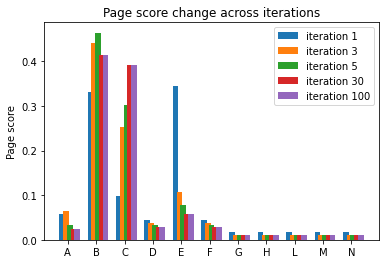

In [38]:
# Constructing connectivity matrix
#     A  B  C  D  E  F  G  H  L  M  N
G = np.array(
    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],# A
     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],# B
     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],# C
     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],# D
     [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0],# E
     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],# F
     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],# G
     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],# H
     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],# L
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],# M
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] # N
    ])

# Run varying iterations
it1 = PageRank(G, 0.9, 1)
it3 = PageRank(G, 0.9, 3)
it5 = PageRank(G, 0.9, 5)
it30 = PageRank(G, 0.9, 30)
it100 = PageRank(G, 0.9, 100)

# Bar width and labels
width = 0.2
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'M', 'N']
x = np.arange(len(labels))
fig, ax = plt.subplots()

# Plot bars
ax.bar(x-width*3/3, it1, width, label='iteration 1')
ax.bar(x-width/3, it3, width, label='iteration 3')
ax.bar(x+width/3, it5, width, label='iteration 5')
ax.bar(x+width*3/3, it30, width, label='iteration 30')
ax.bar(x+width*5/3, it30, width, label='iteration 100')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Page score')
ax.set_title('Page score change across iterations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In the above Page score change across iterations graph we can see that there are big changes when going from
`maxiter = 1` to `maxiter = 3`, `maxiter = 5` and then `maxiter = 30`,
but when going from `maxiter = 30` to `maxiter = 100` the change stops. This shows that there is little to no
improvement when doing more than 30 iterations.
<br><br>
We can also see that the change is bigger when sites are visited more often. The change in site A and C
is easily visible. But the changes in site G, H, L, M, and N are quite small and stagnate at iteration `maxiter = 3`.

### 2) The effect of spider trap

In order to see the effect of spider trap on the output, please perform PageRank algorithm with different alpha values. <br>
Run the algorithm with alpha = 1 (corresponding to not using the teleporting factor):<br>
    - compare its output with alpha = 0.85, <br>
    - please discuss the effect of teleporting factor on the stationary distribution. 
    

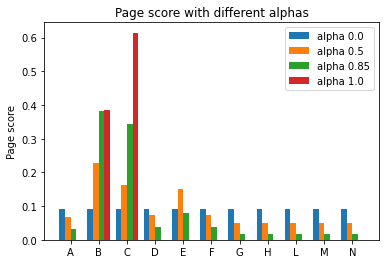

In [39]:
# Run varying alpha
alpha100 = PageRank(G, 1.0, 30)
alpha085 = PageRank(G, 0.85, 30)
alpha050 = PageRank(G, 0.5, 30)
alpha000 = PageRank(G, 0.0, 30)

# Bar width and labels
width = 0.2
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'M', 'N']
x = np.arange(len(labels))
fig, ax = plt.subplots()

# Plot bars
ax.bar(x-width*3/2, alpha000, width, label='alpha 0.0')
ax.bar(x-width/2, alpha050, width, label='alpha 0.5')
ax.bar(x+width/2, alpha085, width, label='alpha 0.85')
ax.bar(x+width*3/2, alpha100, width, label='alpha 1.0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Page score')
ax.set_title('Page score with different alphas')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

When `alpha = 0.0`, we have a random walk through the pages because each page is equally likely to be chosen at each step, which results in an equal score for all pages.

When `alpha=1.0` the spider trap effect is not handled, which means that during a Markov Chain walk, when it reaches page B, it will be stuck between pages B and C forever. Because of this effect, we can see that the score is split between pages B and C, and the remaining pages have score zero. Note that this does not happen with A because page A is handled with the *dead end* algorithm.

When `alpha = 0.85` the spider trap effect is handled, and a transition to any page can occur with probability greater than zero. Since there is no trap, the transition probability for any page is greater than zero. We can still see that pages B and C have a higher score than the others, which is expected as there are many transitions to B, and from B it is possible to make the transition to C.

---
Write at the top of the first page of your report: “Introduction to Scientific Computing, Practical Markov Chains”, followed by your names, student numbers, and the date when you hand in the report.

Since you work in pairs, you need to include information in your report about your individual contributions. For each assignment, indicate the contribution (mention percentages) for each of you in terms of tasks performed (program design, program implementation, answering questions posed, writing the report). All files have to be handed in as a single archive (called YourName.zip), where “YourName” is the concatenation of your last names. See Nestor for the address to which you have to send the archive.

#### Implementing the elements of the PageRank algorithm
    - normalize_conn_matrix: Breno 100%
    - appr_stationary: Lukke 100%
    - dead_end Breno: 100%
    - teleporting_factor: Lukke 100%
#### Implementing the PageRank algorithm
    - PageRank algorithm: Lukke 100%
#### Analyzing PageRank algorithm
    - Perform PageRank algorithm: Breno 70% Lukke 30%
    - The effect of spider trap: Breno 100%
